In [ ]:
# Linking my google drive to the colab page
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzipping the contentes of dataset
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace __MACOSX/._archive? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [ ]:
# Reading the train data
train_raw_data = "/content/archive/train"

In [ ]:
# Reading the validation data
valid_raw_data = "/content/archive/test"

In [ ]:
# Creating the class labels for the data sets
labels = ["Bear", "Bull", "Camel", "Cattle", "Cheetah", "Chicken", "Crocodile", "Deer", "Duck", "Eagle", "Elephant", "Fox", "Frog", "Giraffe", "Goat", "Goose", "Hamster", "Hedgehog", "Hippopotamus", "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Monkey", "Mouse", "Mule", "Ostrich", "Otter", "Owl", "Panda", "Parrot", "Penguin", "Pig", "Polar bear", "Rabbit", "Raccoon", "Red panda", "Rhinoceros", "Scorpion", "Sheep", "Snake", "Squirrel", "Swan", "Tiger", "Tortoise", "Turkey", "Turtle", "Woodpecker", "Zebra"]
label_len = len(labels)
print(label_len) # Printing the length of the class labels

51


In [ ]:
X = []
Y = []

# Loading the dataset
for label in labels:
    folderpath = os.path.join(train_raw_data , label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None: # Resizing all the images to 224 width and height
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Converting list of data to numpy array
X_data = np.array(X)
Y_labels = np.array(Y)

In [ ]:
# Printing the shape of the training dataset
print("X_Data shape:", X_data.shape)
print("Y_Labels shape:", Y_labels.shape)

X_Data shape: (11364, 224, 224, 3)
Y_Labels shape: (11364,)


In [ ]:
X_valid = []
Y_valid = []
X_valid_path = []

# Loading the dataset
for label in labels:
    folderpath = os.path.join(valid_raw_data, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None: # Resizing all the images to 224 width and height
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))

# Converting list of data to numpy array
X_valid_data = np.array(X_valid)
Y_valid_labels = np.array(Y_valid)

In [ ]:
# Printing the shape of the validation dataset
print("X_valid_data shape:", X_valid_data.shape)
print("Y_valid_Labels shape:", Y_valid_labels.shape)

X_valid_data shape: (3893, 224, 224, 3)
Y_valid_Labels shape: (3893,)


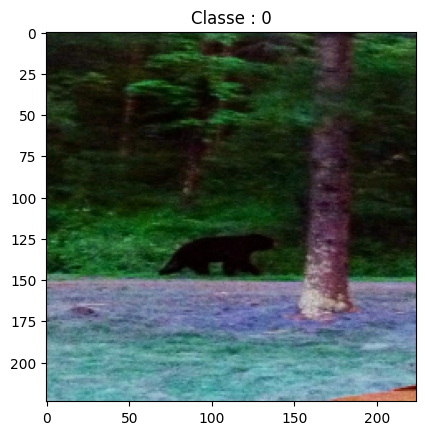

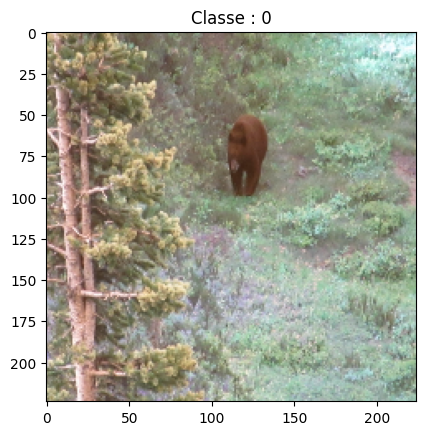

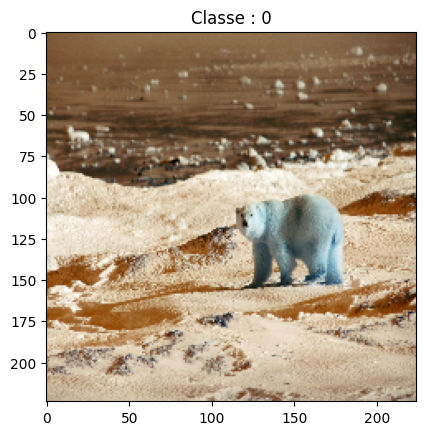

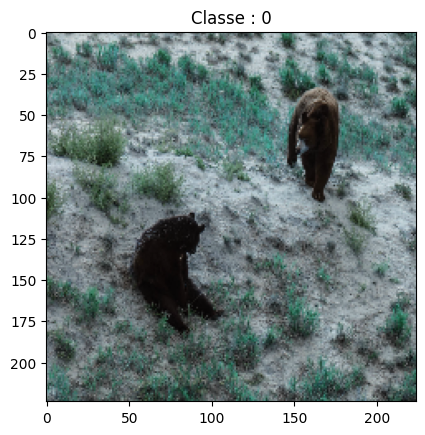

In [ ]:
# Printing the image data with its corresponding class label
for i in range(4):
    plt.imshow(X_data[i])
    plt.title(f"Classe : {Y_labels[i]}")
    plt.show()

In [ ]:
# Creating the base model of the ResNet50 CNN architecture
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))

In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Converting the categorical labels to numerical values
Y_onehotEncoder = to_categorical(Y_labels)
Y_valid_onehotEncoder = to_categorical(Y_valid_labels)

In [ ]:
# Training the model using epochs
history = model.fit(X_data, Y_onehotEncoder, epochs=20, validation_data=(X_valid_data, Y_valid_onehotEncoder ))

Epoch 1/20
356/356 [==============================] - 64s 163ms/step - loss: 1.1388 - accuracy: 0.6803 - val_loss: 0.9234 - val_accuracy: 0.7398
Epoch 2/20
356/356 [==============================] - 46s 129ms/step - loss: 0.6066 - accuracy: 0.8083 - val_loss: 0.9493 - val_accuracy: 0.7298
Epoch 3/20
356/356 [==============================] - 46s 128ms/step - loss: 0.4606 - accuracy: 0.8464 - val_loss: 0.8670 - val_accuracy: 0.7508
Epoch 4/20
356/356 [==============================] - 55s 155ms/step - loss: 0.3480 - accuracy: 0.8773 - val_loss: 0.8870 - val_accuracy: 0.7511
Epoch 5/20
356/356 [==============================] - 55s 155ms/step - loss: 0.2783 - accuracy: 0.8965 - val_loss: 0.9663 - val_accuracy: 0.7490
Epoch 6/20
356/356 [==============================] - 55s 155ms/step - loss: 0.2575 - accuracy: 0.9027 - val_loss: 1.0479 - val_accuracy: 0.7578
Epoch 7/20
356/356 [==============================] - 46s 129ms/step - loss: 0.2292 - accuracy: 0.9129 - val_loss: 1.0020 - val_ac

In [ ]:
# Predicting the class labels for the validation dataset
Y_prediction = model.predict(X_valid_data)
Y_predtiction_classes = np.argmax(Y_prediction, axis=1)

122/122 [==============================] - 12s 90ms/step


In [ ]:
# Calculating the accuracy score
AccuracyScore = accuracy_score(Y_valid_labels, Y_predtiction_classes)
print("Score of precision:", AccuracyScore) # Pringting the accuracy score
print("Accuracy Score: {:.2f}%".format(AccuracyScore*100))

Score of precision: 0.7590547135884922
Accuracy Score: 75.91%


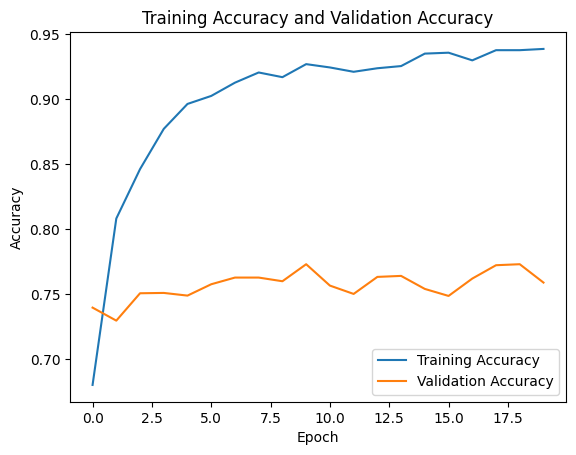

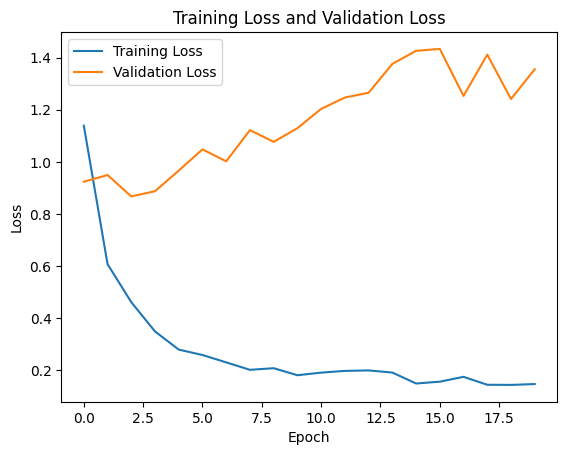

In [ ]:
# Printing the graph between training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Printing the graph between training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

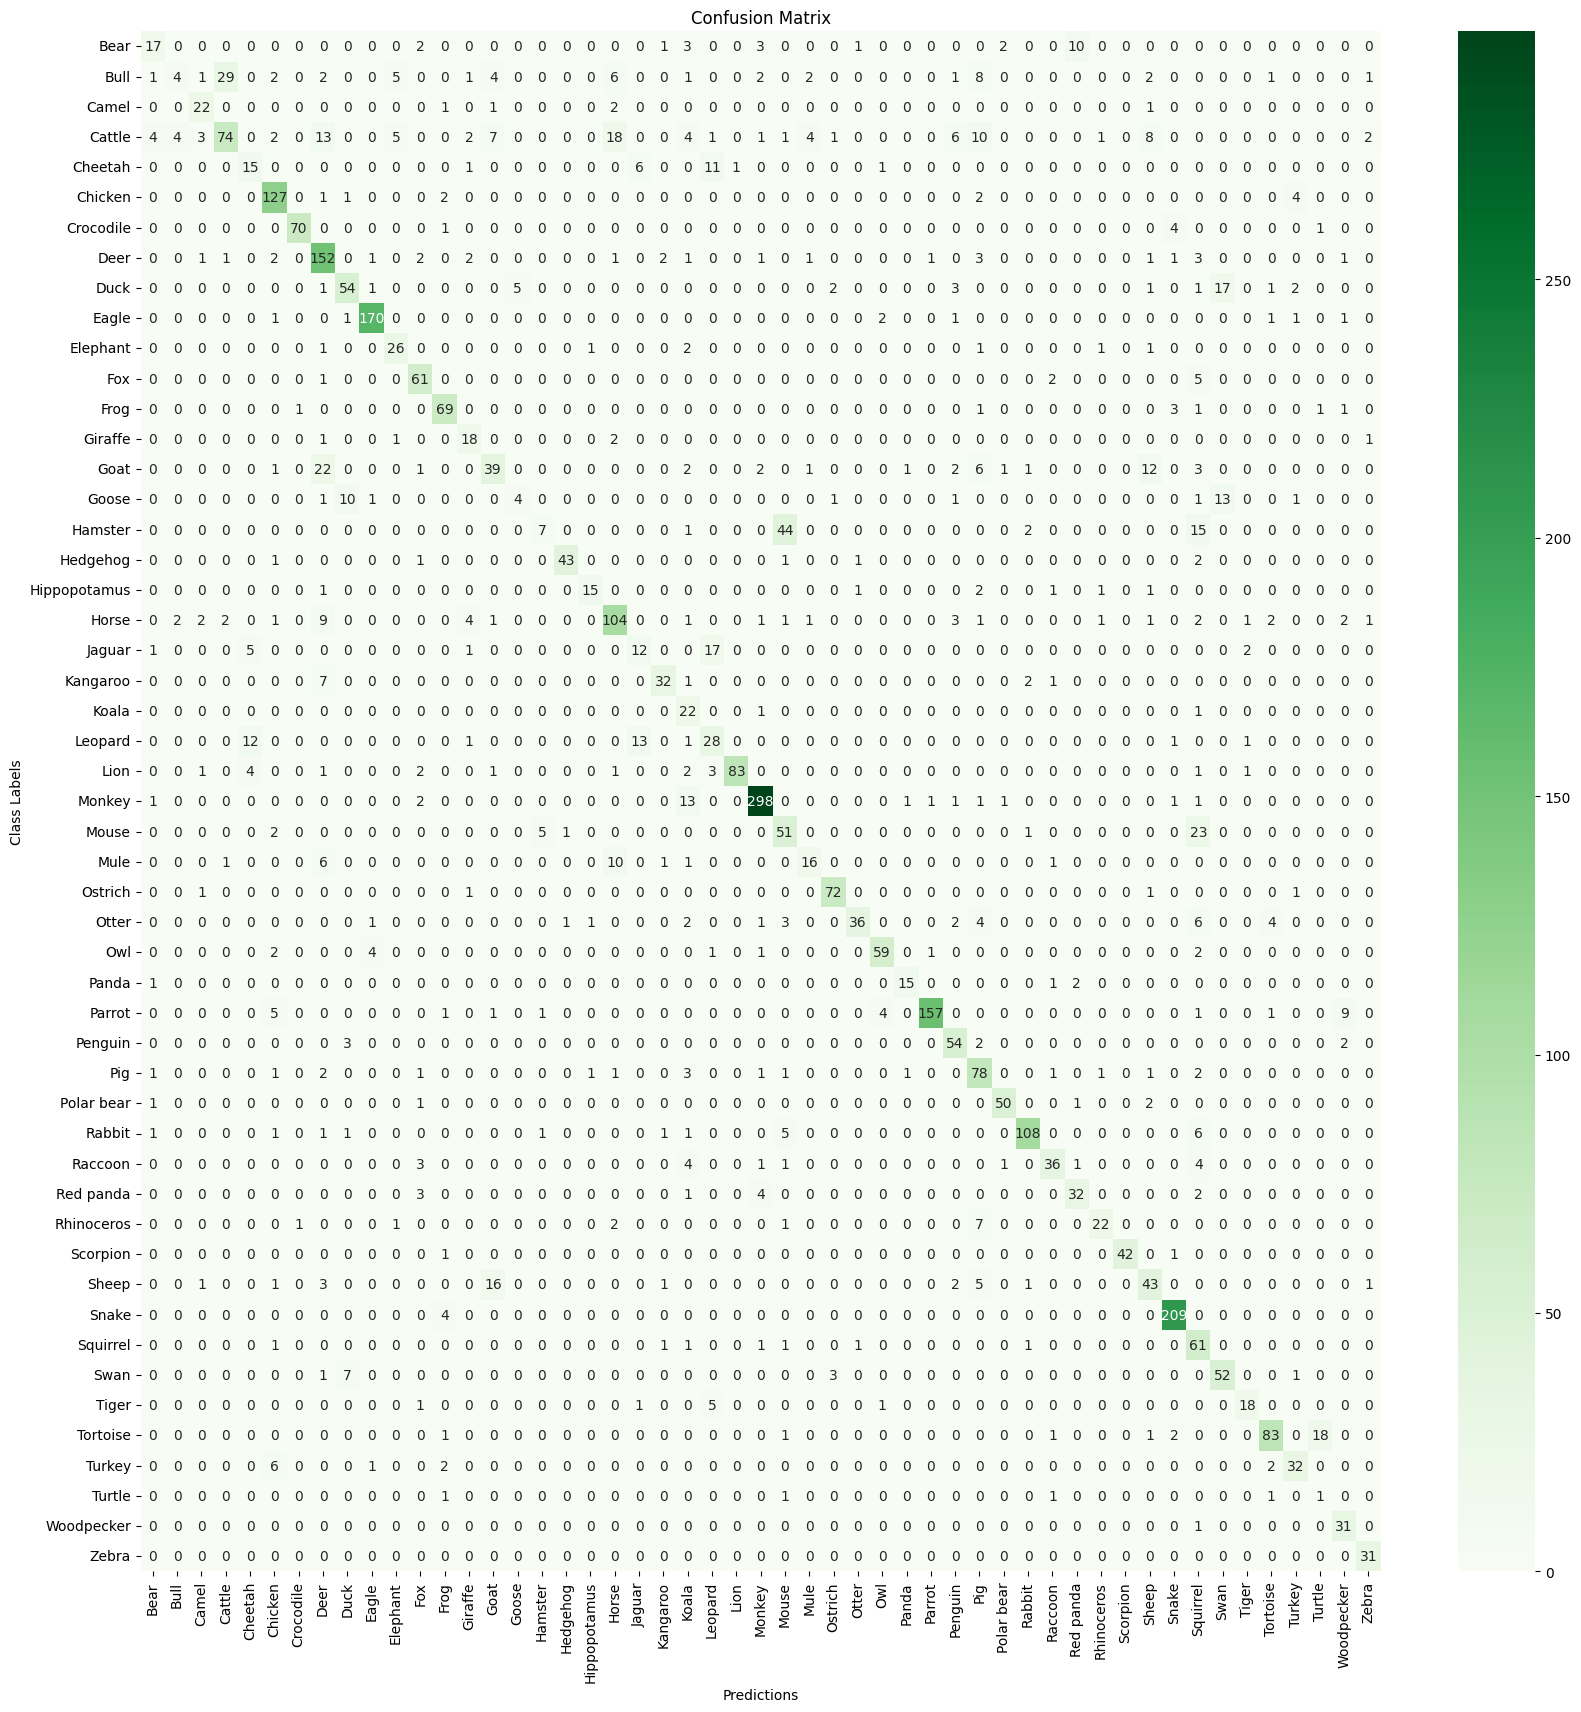

In [ ]:
# Creating confusion matrix
ConfusionMatrix = confusion_matrix(Y_valid_labels, Y_predtiction_classes)
# Printing the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Class Labels')
plt.show()

In [ ]:
# Saving the model
model.save('ResNet50_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
